<a href="https://colab.research.google.com/github/r-hugoalves/Data_Wrangling/blob/master/Exerc%C3%ADcios_Data_Wrangling_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercícios: Data Wrangling - Parte 2

Notebook específico para a resolução de exercícios. Todo o material teórico se encontra [aqui](https://colab.research.google.com/drive/1dl9W2Qu0HEwAFw56WpIk8KeQi4MtA5kj?usp=sharing)

## Exercício 1

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`.

In [1]:
from bs4 import BeautifulSoup

#Importação do arquivo XML
with open(file='./estados_bruto.xml', mode='r') as arquivo_xml:
  dados_xml = arquivo_xml.read()

dados_estados = BeautifulSoup(dados_xml, 'xml')

#Extraindo a tag ID
tags_id = dados_estados.find_all('ID')

#Extraindo a tag NOME
tags_nome = dados_estados.find_all('NOME')

#Extraindo a tag IDCAPITAL
tags_idcapital = dados_estados.find_all('IDCAPITAL')

#Extraindo a tag SIGLA
tags_sigla = dados_estados.find_all('SIGLA')

#Extraindo a tag REGIAO
tags_regiao = dados_estados.find_all('REGIAO')


In [2]:
#Vamos agora tratar as listas e escrever as informações no arquivo .CSV
import csv

with open(file='estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerow(['ID_ESTADO', 'UF', 'CAPITAL', 'SIGLA', 'REGIAO'])

  for i in range(0,len(tags_id)):
    escritor_csv.writerow([
        tags_id[i].get_text(),
        tags_nome[i].get_text(),
        tags_idcapital[i].get_text(),
        tags_sigla[i].get_text(),
        tags_regiao[i].get_text()
    ])

## Exercício 2

Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.csv` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

In [3]:
import pandas as pd

cidades_df = pd.read_csv('cidades-bruto.csv', sep=',')
cidades_df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [4]:
dados_cidades_df = cidades_df[['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

#Para melhor visualização, vamos alterar o nome da coluna 'nome' para cidade
dados_cidades_df = dados_cidades_df.rename(columns={'nome': 'Cidade'})
dados_cidades_df

,UF,Cidade,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


## Exercício 3

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`.

In [5]:
#Transformando o arquivo estados-limpo.csv em um datraframe para fazer a combinação
estados_df = pd.read_csv('estados-limpo.csv', sep=';')
estados_df

,ID_ESTADO,UF,CAPITAL,SIGLA,REGIAO
0,1,ACRE,16,AC,NORTE
1,2,ALAGOAS,68,AL,NORDESTE
2,3,AMAPA,131,AP,NORTE
3,4,AMAZONAS,178,AM,NORTE
4,5,BAHIA,536,BA,NORDESTE
5,6,CEARA,676,CE,NORDESTE
6,7,DISTRITO FEDERAL,916,DF,CENTRO-OESTE
7,8,ESPIRITO SANTO,879,ES,SUDESTE
8,9,GOIAS,973,GO,CENTRO-OESTE
9,10,MARANHAO,1309,MA,NORDESTE


In [6]:
#Aqui tem um problema que pode dar confusão na combinação: os estados estão sem acentos, e no dados_cidades_df eles possuem acentos. Vamos tratar isso
#A única exceção é Espírito Santo que está sem acento nas duas tabelas

estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'AMAPÁ' if acento == 'AMAPA' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'CEARÁ' if acento == 'CEARA' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'GOIÁS' if acento == 'GOIAS' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'MARANHÃO' if acento == 'MARANHAO' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'PARÁ' if acento == 'PARA' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'PARANÁ' if acento == 'PARANA' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'PARAÍBA' if acento == 'PARAIBA' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'PIAUÍ' if acento == 'PIAUI' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'RONDÔNIA' if acento == 'RONDONIA' else acento)
estados_df['UF'] = estados_df['UF'].apply(lambda acento: 'SÃO PAULO' if acento == 'SAO PAULO' else acento)

In [7]:
brasil_df_bruto= pd.merge(left=estados_df, right=dados_cidades_df, on='UF', how='outer')
brasil_df_bruto

,ID_ESTADO,UF,CAPITAL,SIGLA,REGIAO,Cidade,PIB,Pop_est_2009,PIB_percapita
0,1,ACRE,16,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,1,ACRE,16,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,1,ACRE,16,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,1,ACRE,16,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,1,ACRE,16,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...,...,...
5561,27,MINAS GERAIS,4790,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5562,27,MINAS GERAIS,4790,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5563,27,MINAS GERAIS,4790,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
5564,27,MINAS GERAIS,4790,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


In [8]:
#Existe uma cidade em específico, de PIB: 86340.6015625 que tem o nome dela como NaN. Vamos tratar: 
brasil_df = brasil_df_bruto.fillna('')

In [9]:
#Vamos converter o brasil_df para um arquivo csv
brasil_df.to_csv('brasil.csv', index=False, sep=';', encoding='utf8')

In [10]:
brasil_df

,ID_ESTADO,UF,CAPITAL,SIGLA,REGIAO,Cidade,PIB,Pop_est_2009,PIB_percapita
0,1,ACRE,16,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,1,ACRE,16,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,1,ACRE,16,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,1,ACRE,16,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,1,ACRE,16,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...,...,...
5561,27,MINAS GERAIS,4790,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5562,27,MINAS GERAIS,4790,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5563,27,MINAS GERAIS,4790,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
5564,27,MINAS GERAIS,4790,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


## Exercício 5

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

- Quais são as 10 cidades mais populosas do Brasil?
- Quais são as 5 cidades com a menor PIB per capita da região nordeste?
- Quais são as 15 cidades com maior PIB do do estado de São Paulo?
- Qual é o PIB do estado de Santa Catarina?
- Qual é o população da região sul?
- Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?
- Qual é a população do Brasil?

In [11]:
# Quais são as 10 cidades mais populosas do Brasil?
brasil_df.sort_values(by=['Pop_est_2009'], ascending=False).head(10)

,ID_ESTADO,UF,CAPITAL,SIGLA,REGIAO,Cidade,PIB,Pop_est_2009,PIB_percapita
4414,24,SÃO PAULO,4361,SP,SUDESTE,São Paulo,389317152.0,11037593,35271.929688
2755,18,RIO DE JANEIRO,2779,RJ,SUDESTE,Rio de Janeiro,175739344.0,6186710,28405.949219
246,5,BAHIA,536,BA,NORDESTE,Salvador,32824228.0,2998056,10948.500000
803,7,DISTRITO FEDERAL,916,DF,CENTRO-OESTE,Brasília,131487264.0,2606885,50438.460938
767,6,CEARÁ,676,CE,NORDESTE,Fortaleza,31789186.0,2505552,12687.500000
5458,27,MINAS GERAIS,4790,MG,SUDESTE,Belo Horizonte,44595204.0,2452617,18182.699219
2061,15,PARANÁ,2002,PR,SUL,Curitiba,45762420.0,1851215,24720.210938
142,4,AMAZONAS,178,AM,NORTE,Manaus,40486108.0,1738641,23286.060547
2454,16,PERNAMBUCO,2439,PE,NORDESTE,Recife,24835340.0,1561659,15903.179688
1692,13,PARÁ,1561,PA,NORTE,Belém,16526989.0,1437600,11496.240234


In [12]:
# Quais são as 5 cidades com o menor PIB per capita da região nordeste?

#Primeiro, vamos selecionar apenas as colunas de PIB, Região e Cidade
cidades_nordeste_PIB = brasil_df[['PIB', 'REGIAO', 'Cidade']]

#Agora, vamos aplicar o filtro para pegar apenas a região do nordeste
cidades_nordeste = cidades_nordeste_PIB.query("REGIAO == 'NORDESTE'")

#Por fim, aplicamos o filtro do PIB
top_5_pib = cidades_nordeste.sort_values(by=['PIB']).head(5)
top_5_pib

,PIB,REGIAO,Cidade
2694,5770.282227,NORDESTE,Santo Antônio dos Milagres
2568,7714.598145,NORDESTE,São Miguel da Baixa Grande
1754,8294.528320,NORDESTE,Quixabá
2611,8365.680664,NORDESTE,Miguel Leão
2731,8445.269531,NORDESTE,São Luis do Piauí


In [13]:
# Quais são as 15 cidades com maior PIB do do estado de São Paulo?

#Primeiro, vamos selecionar apenas as colunas de PIB, UF e Cidade
cidades = brasil_df[['PIB', 'UF', 'Cidade']]

#Agora, vamos aplicar o filtro para pegar apenas as cidades do estado de São Paulo
cidades_sao_paulo = cidades.query("UF == 'SÃO PAULO'")

#Por fim, aplicamos o filtro do PIB
top_15_pib = cidades_sao_paulo.sort_values(by=['PIB'], ascending=False).head(5)
top_15_pib

,PIB,UF,Cidade
4414,389317152.0,SÃO PAULO,São Paulo
4366,32473828.0,SÃO PAULO,Guarulhos
4483,31654720.0,SÃO PAULO,Campinas
4248,31616452.0,SÃO PAULO,Osasco
3951,28935768.0,SÃO PAULO,São Bernardo do Campo


In [14]:
# Qual é o PIB do estado de Santa Catarina?

#Na variável de cidades que já temos, vamos selecioanr o estado de Santa Catarina
cidades_santa_catarina = cidades.query("UF == 'SANTA CATARINA'")

#Por fim, vamos tirar a média de todos os PIB's das cidades, obtendo o valor do Estado
pib_santa_catarina = (cidades_santa_catarina.describe().T).loc['PIB','mean']
pib_santa_catarina

443024.7670715125

In [15]:
# Qual é o população da região sul?

#Primeiro, vamos selecionar apenas as colunas de Região Pop_est_2009
populacao_regioes_df = brasil_df[['REGIAO', 'Pop_est_2009']]

#Agora, vamos aplicar os filtros para ter apenas a região Sul
regiao_sul = populacao_regioes_df.query("REGIAO == 'SUL'")

#Por fim, vamos obter a soma das população de cada cidade
populacao_regiao_sul = regiao_sul[['Pop_est_2009']].agg('sum')
populacao_regiao_sul

Pop_est_2009    27719118
dtype: int64

In [16]:
# Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

#Na variável de cidades que já temos, vamos selecioanr o estado de Santa Catarina
cidades_mato_grosso_sul= cidades.query("UF == 'MATO GROSSO DO SUL'")

#Por fim, vamos tirar a média de todos os PIB's das cidades, obtendo o valor do Estado
pib_mato_grosso_sul = (cidades_mato_grosso_sul.describe().T).loc['PIB','mean']
pib_mato_grosso_sul

466257.6111278045

In [17]:
# Qual é a população do Brasil?

#Vamos trabalhar com a variável que já nos traz a população por região, e aplicar o filtro da soma nela
populacao_brasil = populacao_regioes_df[['Pop_est_2009']].agg('sum')
populacao_brasil

Pop_est_2009    191501418
dtype: int64

## Exercício 6

Gere um gráfico de barras com as 10 cidades menos populosas do Brasil

In [ ]:
#Primeiro, vamos obter um dataframe com as cidades e a população 
populacao_cidades = brasil_df[['Cidade', 'Pop_est_2009']]

#Agora, aplicamos um filtro para saber quais são as menos populosas
top_10_menos_populosas = populacao_cidades.sort_values(by=['Pop_est_2009']).head(10)

<AxesSubplot:title={'center':'Top 10 cidades menos populosas'}, ylabel='População'>

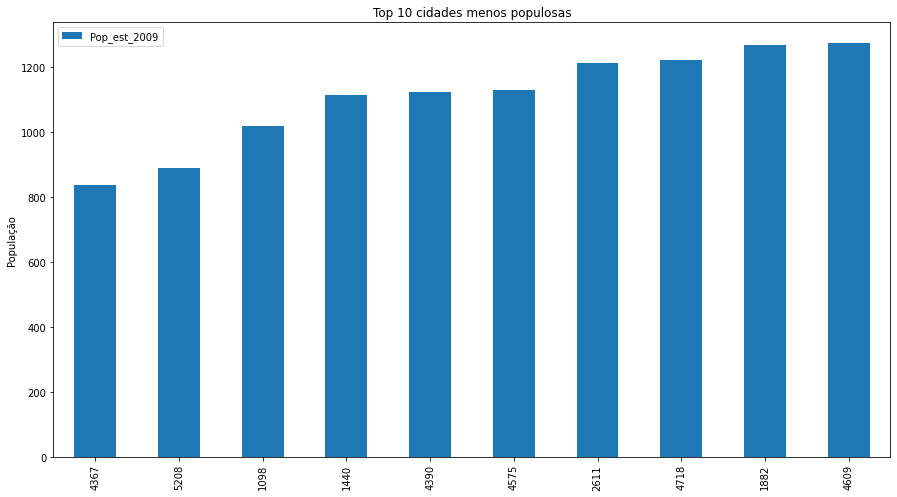

In [86]:
#Por fim, vamos gerar o gráfico
grafico_top_10 = top_10_menos_populosas[['Cidade','Pop_est_2009']].plot.bar(figsize=(15,8))
grafico_top_10.set_ylabel('População')
grafico_top_10.set_title('Top 10 cidades menos populosas')

grafico_top_10

## Exercício 7

Gere um gráfico de pizza com a proporção da população do Brasil por região

<AxesSubplot:title={'center':'Proporção da População do Brasil por Região'}, ylabel='Regiões do Brasil'>

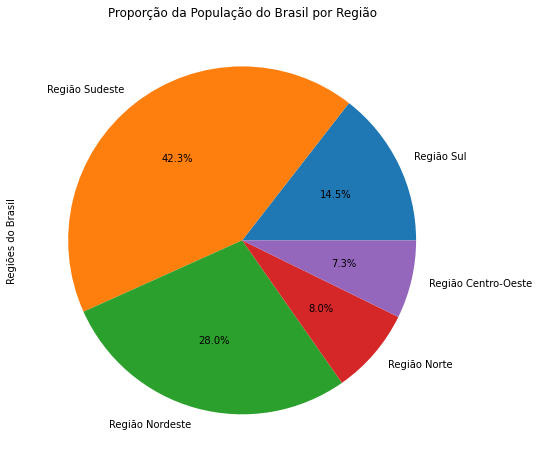

In [75]:
# A proporção vai ser: (populacaoRegiao * 100)/populacaoBrasil

#Já temos populacaoBrasil e populacao_regiao_sul, vamos obter primeiramente a população das outras regiões

#População Sudeste
regiao_sudeste = populacao_regioes_df.query("REGIAO == 'SUDESTE'")
populacao_regiao_sudeste = regiao_sudeste[['Pop_est_2009']].agg('sum')
populacao_regiao_sudeste

#População Nordeste
regiao_nordeste = populacao_regioes_df.query("REGIAO == 'NORDESTE'")
populacao_regiao_nordeste = regiao_nordeste[['Pop_est_2009']].agg('sum')

#População Norte
regiao_norte = populacao_regioes_df.query("REGIAO == 'NORTE'")
populacao_regiao_norte = regiao_norte[['Pop_est_2009']].agg('sum')

#População Centro-Oeste
regiao_centro_oeste = populacao_regioes_df.query("REGIAO == 'CENTRO-OESTE'")
populacao_regiao_centro_oeste = regiao_centro_oeste[['Pop_est_2009']].agg('sum')

#Proporção das populações
proporcao_sul = (populacao_regiao_sul * 100)/ populacao_brasil
proporcao_sudeste = (populacao_regiao_sudeste * 100)/ populacao_brasil
proporcao_nordeste = (populacao_regiao_nordeste * 100)/ populacao_brasil
proporcao_norte = (populacao_regiao_norte * 100)/ populacao_brasil
proporcao_centro_oeste = (populacao_regiao_centro_oeste * 100)/ populacao_brasil

proporcoes_regioes = pd.concat([proporcao_sul, proporcao_sudeste, proporcao_nordeste, proporcao_norte, proporcao_centro_oeste])
proporcoes_regioes.index = ['Região Sul', 'Região Sudeste', 'Região Nordeste', 'Região Norte', 'Região Centro-Oeste']

#Agora, vamos gerar o gráfico
proporcoes_regioes.plot.pie(figsize=(15,8), title='Proporção da População do Brasil por Região', autopct='%1.1f%%', label='Regiões do Brasil')